In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean
import matplotlib
import os as os
import dask as dask
from scipy.io import netcdf
import mmap
%matplotlib inline

#### ENERGIE CINETIQUE = 1/2 * (U^2+V^2)

In [2]:
%%time
#                          _________
#ENERGIE CINETIQUE = 1/2 * (U^2+V^2)

files = os.listdir("/bettik/roussilh/noMED-degrad")
Umoy = 0
Vmoy = 0


from scipy.io import netcdf_file

nmean_u = 0
for filename in files:
    
    if "Ubottomdegrad" in filename:
        
        filepath ="/bettik/roussilh/noMED-degrad/"
        f = netcdf_file(filepath+filename, 'r')
        for n in range (0,24):
            u = f.variables['degraded_vozocrtx'][n,:,:].copy()
            Umoy += u*u
            nmean_u += 1
        f.close() 
        
nmean_v = 0        
for filename in files:
    if "Vbottomdegrad" in filename:

        
        filepath ="/bettik/roussilh/noMED-degrad/"
        f = netcdf_file(filepath+filename, 'r')
        for n in range (0,24):
            u = f.variables['degraded_vomecrty'][n,:,:].copy()
            Vmoy += u*u
            nmean_v += 1
        f.close()  
          
Umoy1 = Umoy/nmean_u
Vmoy1 = Vmoy/nmean_v 

CPU times: user 1min 23s, sys: 27.5 s, total: 1min 51s
Wall time: 9min 27s


In [3]:
Umoy1.shape

(1181, 1480)

In [4]:
Vmoy1.shape

(1182, 1480)

In [5]:
Vmoy2 = np.delete(Vmoy1, -1, axis=0)
Vmoy2.shape

(1181, 1480)

In [6]:
Ec = 1/2*(Umoy1 + Vmoy2)
Ec

array([[9.9993856e+09, 9.9993856e+09, 9.9993856e+09, ..., 9.9993856e+09,
        9.9993856e+09, 9.9993856e+09],
       [9.9993856e+09, 9.9993856e+09, 9.9993856e+09, ..., 9.9993856e+09,
        9.9993856e+09, 9.9993856e+09],
       [9.9993856e+09, 9.9993856e+09, 9.9993856e+09, ..., 9.9993856e+09,
        9.9993856e+09, 9.9993856e+09],
       ...,
       [9.9993856e+09, 9.9993856e+09, 9.9993856e+09, ..., 6.2455647e-03,
        6.3944543e-03, 6.8134437e-03],
       [9.9993856e+09, 9.9993856e+09, 9.9993856e+09, ..., 7.7694468e-03,
        8.8915117e-03, 8.9979209e-03],
       [9.9993856e+09, 9.9993856e+09, 9.9993856e+09, ..., 1.7904731e-02,
        1.6489100e-02, 1.6239068e-02]], dtype=float32)

In [7]:
dirf='/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Vbottomdegrad.nc'
ds=xr.open_dataset(dirf,decode_times=False)
ds

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1182, x: 1480, depthv: 1)
Coordinates:
  * depthv             (depthv) float32 0.4805
  * time_counter       (time_counter) float64 3.455e+09 3.455e+09 ... 3.455e+09
Dimensions without coordinates: y, x
Data variables:
    degraded_vomecrty  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:03 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [8]:
navlon = ds.nav_lon
navlat = ds.nav_lat

In [9]:
navlon.shape

(1182, 1480)

In [10]:
navlat.shape

(1182, 1480)

In [11]:
lon = np.delete(navlon, -1, axis=0)
lon.shape

(1181, 1480)

In [12]:
lat = np.delete(navlat, -1, axis=0)
lat.shape

(1181, 1480)

In [13]:
Ec_mask=ma.masked_where(Ec==9.9993856e+09,Ec)

/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_267528/2322639387.py:20: Mat

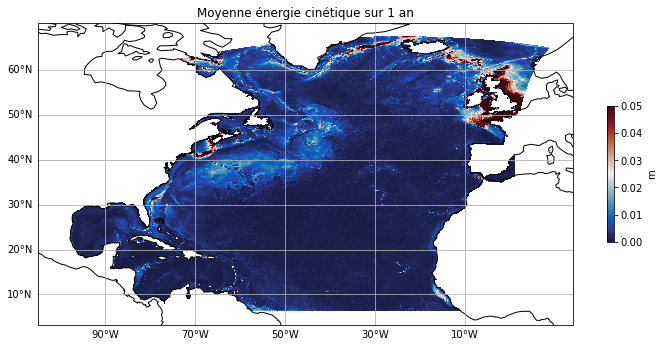

In [14]:
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(lon,lat,Ec_mask,transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,vmin=0,vmax=0.05)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False

ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Moyenne énergie cinétique sur 1 an')
plt.savefig('Moy_Ec_carte_annee.png', bbbox_inches='tight')

####                           __  __
    ENERGIE CINETIQUE = 1/2 * (U^2+V^2)                        

In [15]:
%%time
#                           __  __
#ENERGIE CINETIQUE = 1/2 * (U^2+V^2)

files = os.listdir("/bettik/roussilh/noMED-degrad")
Umoy = 0
Vmoy = 0


from scipy.io import netcdf_file

nmean_u = 0
for filename in files:
    
    if "Ubottomdegrad" in filename:
        
        filepath ="/bettik/roussilh/noMED-degrad/"
        f = netcdf_file(filepath+filename, 'r')
        for n in range (0,24):
            u = f.variables['degraded_vozocrtx'][n,:,:].copy()
            nmean_u += 1
        f.close() 
        
nmean_v = 0        
for filename in files:
    if "Vbottomdegrad" in filename:

        filepath ="/bettik/roussilh/noMED-degrad/"
        f = netcdf_file(filepath+filename, 'r')
        for n in range (0,24):
            v = f.variables['degraded_vomecrty'][n,:,:].copy()
            nmean_v += 1
        f.close()  
          
Umoya = u/nmean_u
Vmoya = v/nmean_v 

CPU times: user 19 s, sys: 42 s, total: 1min
Wall time: 3min 36s


In [16]:
Umoysq= Umoya*Umoya
Vmoysq= Vmoya*Vmoya

In [17]:
Vmoysq2 = np.delete(Vmoysq, -1, axis=0)
Vmoysq2.shape

(1181, 1480)

In [18]:
EC = 1/2*(Umoysq+Vmoysq2)
EC

array([[1.4011464e+02, 1.4011464e+02, 1.4011464e+02, ..., 1.4011464e+02,
        1.4011464e+02, 1.4011464e+02],
       [1.4011464e+02, 1.4011464e+02, 1.4011464e+02, ..., 1.4011464e+02,
        1.4011464e+02, 1.4011464e+02],
       [1.4011464e+02, 1.4011464e+02, 1.4011464e+02, ..., 1.4011464e+02,
        1.4011464e+02, 1.4011464e+02],
       ...,
       [1.4011464e+02, 1.4011464e+02, 1.4011464e+02, ..., 1.9008128e-10,
        1.5470766e-10, 1.3710778e-10],
       [1.4011464e+02, 1.4011464e+02, 1.4011464e+02, ..., 2.1339844e-10,
        3.0796832e-10, 3.1139752e-10],
       [1.4011464e+02, 1.4011464e+02, 1.4011464e+02, ..., 6.6095029e-10,
        6.6679384e-10, 6.3266087e-10]], dtype=float32)

In [19]:
EC_mask = ma.masked_where(EC==1.4011464e+02,EC)

Text(0.5, 1.0, 'Energie cinétique moy sur 1 an')

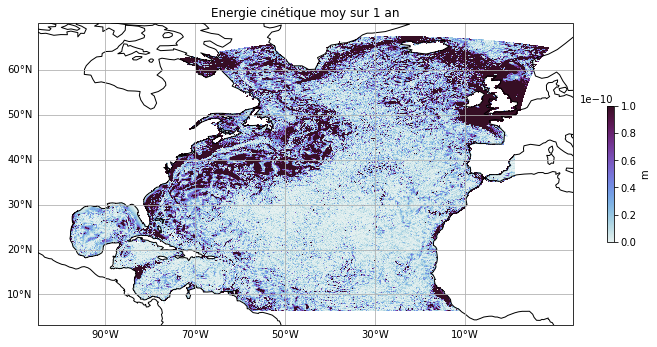

In [20]:
fig = plt.figure(figsize=(12,10))

x=lon
y=lat
z=EC_mask

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(x,y,z,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,vmin=0,vmax=0.0000000001)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Energie cinétique moy sur 1 an')

#### ECART TYPE

In [21]:
%%time
#Ecart type

files = os.listdir("/bettik/roussilh/noMED-degrad")


from scipy.io import netcdf_file


for filename in files:
    
    if "Ubottomdegrad" in filename:
        
        filepath ="/bettik/roussilh/noMED-degrad/"
        f = netcdf_file(filepath+filename, 'r')
        for n in range (0,24):
            ua = f.variables['degraded_vozocrtx'][n,:,:].copy()
            Umoy += (ua-Umoy1)*(ua-Umoy1)
        f.close() 
              
for filename in files:
    if "Vbottomdegrad" in filename:

        
        filepath ="/bettik/roussilh/noMED-degrad/"
        f = netcdf_file(filepath+filename, 'r')
        for n in range (0,24):
            va = f.variables['degraded_vomecrty'][n,:,:].copy()
            Vmoy += (va-Vmoy1)*(va-Vmoy1)
        f.close()  
          


CPU times: user 2min 35s, sys: 46.9 s, total: 3min 22s
Wall time: 4min 14s


In [22]:
V1 = np.delete(Vmoy, -1, axis=0)
V1.shape

(1181, 1480)

In [23]:
Etype = V1 + Umoy
Etype

array([[1.6894554e+24, 1.6894554e+24, 1.6894554e+24, ..., 1.6894554e+24,
        1.6894554e+24, 1.6894554e+24],
       [1.6894554e+24, 1.6894554e+24, 1.6894554e+24, ..., 1.6894554e+24,
        1.6894554e+24, 1.6894554e+24],
       [1.6894554e+24, 1.6894554e+24, 1.6894554e+24, ..., 1.6894554e+24,
        1.6894554e+24, 1.6894554e+24],
       ...,
       [1.6894554e+24, 1.6894554e+24, 1.6894554e+24, ..., 1.0327010e+02,
        1.0527949e+02, 1.1258238e+02],
       [1.6894554e+24, 1.6894554e+24, 1.6894554e+24, ..., 1.2472365e+02,
        1.4225914e+02, 1.4271484e+02],
       [1.6894554e+24, 1.6894554e+24, 1.6894554e+24, ..., 2.5110545e+02,
        2.3438902e+02, 2.3105003e+02]], dtype=float32)

In [24]:
Etype_mask=ma.masked_where(Etype==1.6894554e+24,Etype)

Text(0.5, 1.0, 'Ecart type à la moyenne sur 1 an')

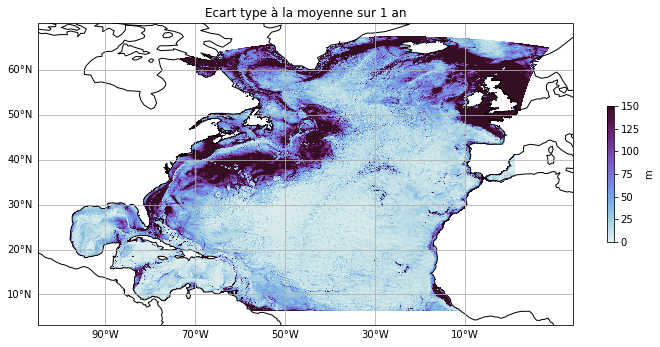

In [25]:
fig = plt.figure(figsize=(12,10))

x=lon
y=lat
z=Etype_mask

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(x,y,z,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,vmin=0,vmax=150)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Ecart type à la moyenne sur 1 an')